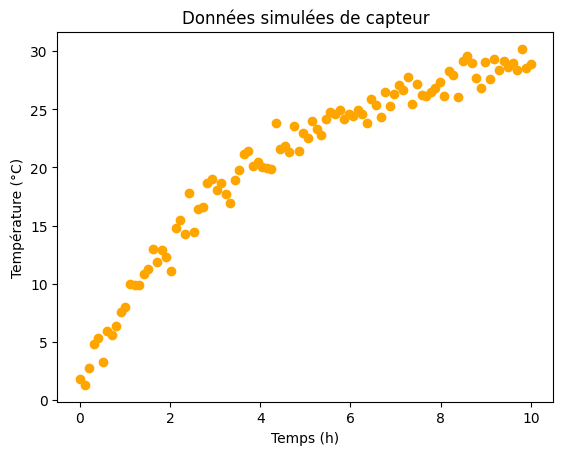

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
t = np.linspace(0, 10, 100)
temp = 30 * (1 - np.exp(-0.3*t)) + np.random.normal(0, 1, len(t))
plt.scatter(t, temp, color='orange')
plt.xlabel("Temps (h)")
plt.ylabel("Température (°C)")
plt.title("Données simulées de capteur")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(t.reshape(-1,1), temp, test_size=0.2)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_s = scaler_X.fit_transform(X_train)
X_test_s = scaler_X.transform(X_test)
y_train_s = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_s = scaler_y.transform(y_test.reshape(-1,1))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_s, y_train_s, validation_split=0.2, epochs=200, callbacks=[es], verbose=1)

2025-11-04 14:34:44.557168: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-04 14:34:44.624273: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-04 14:34:46.329587: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Epoch 1/200


/home/djeddi/anaconda3/envs/py311_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-04 14:34:46.572943: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - loss: 0.6046 - mae: 0.7126 - val_loss: 0.5330 - val_mae: 0.6935
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.5547 - mae: 0.6823 - val_loss: 0.4912 - val_mae: 0.6656
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.5095 - mae: 0.6540 - val_loss: 0.4536 - val_mae: 0.6403
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.4691 - mae: 0.6277 - val_loss: 0.4229 - val_mae: 0.6191
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.4367 - mae: 0.6062 - val_loss: 0.3994 - val_mae: 0.6020
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.4101 - mae: 0.5878 - val_loss: 0.3786 - val_mae: 0.5863
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.3875 - mae: 0.5713 - val_loss: 0.3592 - val_mae: 0.5712
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.3666 - mae: 0.5554 - val_loss: 0.3410 - val_mae: 0.5565
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.3467 - mae: 0.5402 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


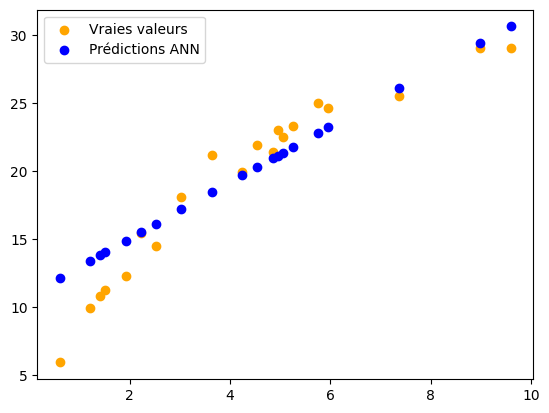

In [7]:
y_pred_s = model.predict(X_test_s)
y_pred = scaler_y.inverse_transform(y_pred_s)
plt.scatter(X_test, y_test, color='orange', label='Vraies valeurs')
plt.scatter(X_test, y_pred, color='blue', label='Prédictions ANN')
plt.legend()
plt.show()

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
poly_model = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly = poly_model.predict(X_test)
print("MSE Polynomiale :", mean_squared_error(y_test, y_poly))
print("MSE ANN :", mean_squared_error(y_test, y_pred))

MSE Polynomiale : 0.6359801336237957
MSE ANN : 5.260011606931004
